In [ ]:
from IPython.display import clear_output

In [ ]:

# Download the required libraries (needed when running outside colab where the environment doesn't come pre-loaded with libraries)

%pip install torch
%pip install torchvision
%pip install matplotlib

clear_output()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision.datasets import MNIST
from torchvision.transforms.functional import to_tensor, to_pil_image, resize
from torchvision import transforms

from torch.utils.data import DataLoader
from torch.optim import Adam

import matplotlib.pyplot as plt

# HARD Exercise (optional):

### We (Great AI Company X) Welcome New employee. We just fireed a careless and lazy man, but not because he is lazy nor carless. He was fired because he was supposed to create a NN model for MNIST dataset. He destroyed the code by copying from Generative models and the internet without trying to understand anything. He did not want to learn. He just tried to get money without finishing his duties. Unfortunately, we don't have time to create a model from scratch, so you are required to fix the bugs in this notebook.

<br/>

### We expect that the architecture is destroyed, in addition to many errors of run time, logical, and missing lines. If you fixed this notebook without refering to anything, you will be upgraded.

### Notes:
1. <B>You are PROHIBITED from using generative models.<B/>
1. <B>You are NOT allowed to change the number of layers in the netwrok.<B/> (change only the number of inputs and outputs)

# Show us your best, AI detective and developer. 😉

## We will use a dataset called MNIST. MNIST contains 60,000 images for training and 10,000 for testing.


## Downloading the dataset

### Run the following cells to download the MNIST dataset.

In [ ]:
train_dataset = MNIST(root='./datasets', train=True, download=True, transform=transforms.ToTensor())
val_dataset = MNIST(root='./datasets', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 154189130.16it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 115477305.84it/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40703502.44it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 6734015.12it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



#### Notice the size of the dataset

In [ ]:
print('Length of train_dataset is', len(train_dataset))
print('Length of val_dataset is'  , len(val_dataset))

Length of train_dataset is 60000
Length of val_dataset is 10000


In [ ]:
batch_size = 64


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

## Let's visualize an image and its channels

The image shape: torch.Size([1, 28, 28])
Number of channels in image:  1
The image label: 5


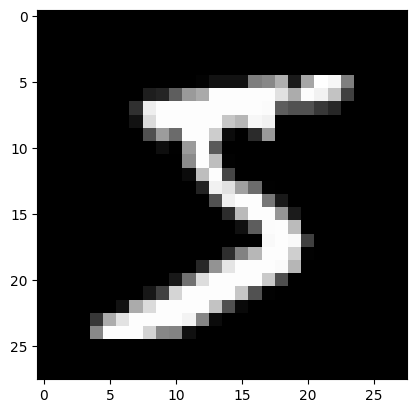

In [ ]:
random_img_idx = 0

image = train_dataset[random_img_idx][0]
label = train_dataset[random_img_idx][1]

print("The image shape:", image.shape)
print('Number of channels in image: ', image.shape[0])
print("The image label:", label)

plt.imshow(image.reshape(image.shape[1], image.shape[1]), cmap='gray')

In [ ]:
import torch.nn.functional as F
class MyMNISTClassifier(nn.Module):
  def __init__(self):
    super(MyMNISTClassifier, self).__init__()

    self.linear1 = nn.Linear(28*28, 512)
    self.linear2 = nn.Linear(512, 128)
    self.linear3 = nn.Linear(128, 64)
    self.linear4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = F.relu(self.linear3(x))
    x = F.relu(self.linear4(x))

    return x

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = MyMNISTClassifier().to(device)

In [ ]:
num_epochs = 5
lr = 1e-3

train_losses = []
val_losses = []

optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

model.to(device)

print(f'Using device {device}')

Using device cuda


In [ ]:
%%time
for epoch_no in range(num_epochs):
  model.train()
  epoch_weighted_loss = 0
  for batch_X, batch_y in train_loader:
    batch_X = batch_X.view(-1, 28*28)

    batch_X = batch_X.to(device)
    batch_y = batch_y.to(device)

    batch_y_probs = model(batch_X)

    loss = criterion(batch_y_probs, batch_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_weighted_loss += len(batch_y) * loss.item()

  epoch_loss = epoch_weighted_loss/len(train_loader.dataset)
  train_losses.append(epoch_loss)

  model.eval()
  correctly_labelled = 0

  with torch.no_grad():
    val_epoch_weighted_loss = 0

    for val_batch_X, val_batch_y in val_loader:

        val_batch_X = val_batch_X.view(-1, 28 * 28)

        val_batch_X = val_batch_X.to(device)
        val_batch_y = val_batch_y.to(device)

        val_batch_y_probs = model(val_batch_X)

        loss = criterion(val_batch_y_probs, val_batch_y)
        val_epoch_weighted_loss += len(val_batch_y) * loss.item()

        val_batch_y_pred = val_batch_y_probs.argmax(dim=1)

        correctly_labelled += (val_batch_y_pred == val_batch_y).sum().item()

  val_epoch_loss = val_epoch_weighted_loss/len(val_loader.dataset)
  val_losses.append(val_epoch_loss)

  print(f'Epoch: {epoch_no}, train_loss={epoch_loss}, val_loss={val_epoch_loss}. labelled {correctly_labelled}/{len(val_loader.dataset)} correctly ({correctly_labelled/len(val_loader.dataset)*100}% accuracy)')

print(f'Training complete on device {device}.')

Epoch: 0, train_loss=0.6954128986040751, val_loss=0.5592860411643982. labelled 7872/10000 correctly (78.72% accuracy)
Epoch: 1, train_loss=0.5323498105843862, val_loss=0.5282136566162109. labelled 7900/10000 correctly (79.0% accuracy)
Epoch: 2, train_loss=0.49870149256388346, val_loss=0.5118033262252808. labelled 7947/10000 correctly (79.47% accuracy)
Epoch: 3, train_loss=0.4839051846345266, val_loss=0.511575152683258. labelled 7974/10000 correctly (79.74% accuracy)
Epoch: 4, train_loss=0.471267454679807, val_loss=0.5117583478927612. labelled 7961/10000 correctly (79.61% accuracy)
Training complete on device cuda.
CPU times: user 45.7 s, sys: 308 ms, total: 46 s
Wall time: 46.3 s


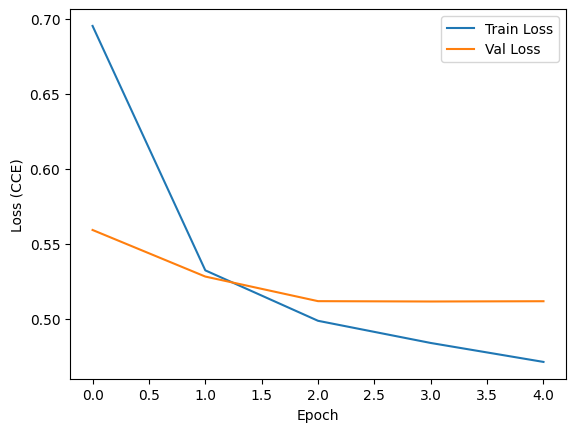

In [ ]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses  , label='Val Loss')

plt.ylabel('Loss (CCE)')
plt.xlabel('Epoch')

plt.legend()
plt.show()

## Play with the model to get a better genralized model.